In [1]:
# libraries!
import numpy as np      # numpy is Python's "array" library
import pandas as pd 
import requests

In [2]:
total_df = pd.read_csv("all_char.csv")


In [3]:
total_df.head()

,sequence,seq_len,molecular_weight,hydrophobicity,instability_index,aromaticity,A %,C %,D %,E %,...,N %,P %,Q %,R %,S %,T %,V %,W %,Y %,label
0,MASREEEQRETTPERGRGAARRPPTMEDVSSPSPSPPPPRAPPKKR...,529,59138.7350,-0.611153,58.945936,0.058601,0.088847,0.024575,0.045369,0.085066,...,0.041588,0.085066,0.039698,0.069943,0.077505,0.039698,0.064272,0.011342,0.011342,1
1,MKTQRDGHSLGRWSLVLLLLGLVMPLAIIAQVLSYKEAVLRAIDGI...,170,19301.1649,-0.441765,37.586471,0.064706,0.041176,0.023529,0.094118,0.035294,...,0.029412,0.052941,0.041176,0.088235,0.064706,0.058824,0.064706,0.005882,0.011765,1
2,MDAQTRRRERRAEKQAQWKAANPLLVGVSAKPVNRPILSLNRKPKS...,107,12298.1162,-0.919626,46.321495,0.037383,0.074766,0.009346,0.018692,0.065421,...,0.056075,0.065421,0.065421,0.121495,0.074766,0.037383,0.046729,0.018692,0.018692,1
3,MGDVEKGKKIFVQKCAQCHTVEKGGKHKTGPNLHGLFGRKTGQAPG...,105,11832.6058,-0.875238,15.507619,0.085714,0.057143,0.019048,0.028571,0.085714,...,0.047619,0.038095,0.028571,0.019048,0.000000,0.095238,0.028571,0.009524,0.038095,1
4,MPKRGKKGAVAEDGDELRTEPEAKKSKTAAKKNDKEAAGEGPALYE...,318,35554.0730,-0.583019,43.411950,0.088050,0.084906,0.022013,0.059748,0.075472,...,0.034591,0.066038,0.031447,0.053459,0.062893,0.034591,0.047170,0.022013,0.037736,1


In [4]:
import pandas as pd
import numpy as np

X = total_df.iloc[:,0:5]  #independent columns
y = total_df.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = total_df.corr()
top_corr_features = corrmat.index

z = total_df[top_corr_features].corr()
z

,seq_len,molecular_weight,hydrophobicity,instability_index,aromaticity,A %,C %,D %,E %,F %,...,N %,P %,Q %,R %,S %,T %,V %,W %,Y %,label
seq_len,1.000000,0.989696,-0.041603,0.000732,0.124401,-0.095965,-0.105601,0.132279,0.058322,0.097919,...,0.224676,0.015549,0.033846,-0.078965,0.056683,-0.141580,0.024012,0.029528,0.101212,0.180052
molecular_weight,0.989696,1.000000,-0.077904,-0.001635,0.154170,-0.131520,-0.141555,0.153623,0.082895,0.119291,...,0.255748,0.023172,0.049816,-0.066502,0.067214,-0.142050,0.032636,0.038686,0.126238,0.197839
hydrophobicity,-0.041603,-0.077904,1.000000,-0.119240,-0.245899,0.549909,0.555840,-0.378500,-0.427422,-0.048773,...,-0.328244,-0.208821,-0.338622,-0.482454,-0.230300,0.189462,0.026382,-0.134798,-0.304425,-0.096751
instability_index,0.000732,-0.001635,-0.119240,1.000000,-0.102835,-0.035961,0.144863,-0.153864,0.114296,-0.079516,...,-0.135023,0.197184,0.135728,0.263191,0.112621,-0.090775,-0.219134,-0.045841,-0.070713,0.042245
aromaticity,0.124401,0.154170,-0.245899,-0.102835,1.000000,-0.404681,-0.394422,0.237863,0.137516,0.725396,...,0.275002,0.152123,0.132273,-0.022250,0.225322,-0.248087,0.104944,0.493840,0.706702,0.047106
A %,-0.095965,-0.131520,0.549909,-0.035961,-0.404681,1.000000,0.347259,-0.312519,-0.316110,-0.283194,...,-0.321907,-0.203692,-0.268404,-0.168976,-0.318108,0.176383,-0.234457,-0.146509,-0.333221,-0.087910
C %,-0.105601,-0.141555,0.555840,0.144863,-0.394422,0.347259,1.000000,-0.383030,-0.377144,-0.309017,...,-0.248789,-0.269675,-0.319696,-0.291511,-0.309242,0.273505,-0.415852,-0.156601,-0.279869,-0.028444
D %,0.132279,0.153623,-0.378500,-0.153864,0.237863,-0.312519,-0.383030,1.000000,0.303137,0.197773,...,0.185905,0.025257,0.119853,0.001211,0.114140,-0.248732,0.175125,0.068403,0.174083,0.057739
E %,0.058322,0.082895,-0.427422,0.114296,0.137516,-0.316110,-0.377144,0.303137,1.000000,0.150609,...,0.054037,0.027524,0.157203,0.119662,-0.026220,-0.317973,0.135769,-0.026721,0.106361,0.060460
F %,0.097919,0.119291,-0.048773,-0.079516,0.725396,-0.283194,-0.309017,0.197773,0.150609,1.000000,...,0.163867,0.113256,0.073628,-0.032460,0.118600,-0.205608,0.084374,0.086869,0.185474,0.038330


In [5]:
import plotly.express as px
# plot heatmap
fig = px.imshow(z, text_auto=True)
fig.show()

In [13]:
z.sort_values(by=['label'], ascending=False)

,seq_len,molecular_weight,hydrophobicity,instability_index,aromaticity,A %,C %,D %,E %,F %,...,N %,P %,Q %,R %,S %,T %,V %,W %,Y %,label
label,0.180052,0.197839,-0.096751,0.042245,0.047106,-0.087910,-0.028444,0.057739,0.060460,0.038330,...,0.231103,-0.035357,0.003134,-0.053998,0.034512,-0.033222,-0.067829,-0.046159,0.075750,1.000000
N %,0.224676,0.255748,-0.328244,-0.135023,0.275002,-0.321907,-0.248789,0.185905,0.054037,0.163867,...,1.000000,-0.030151,0.121104,-0.116368,0.167696,-0.169511,0.021553,0.072379,0.275623,0.231103
molecular_weight,0.989696,1.000000,-0.077904,-0.001635,0.154170,-0.131520,-0.141555,0.153623,0.082895,0.119291,...,0.255748,0.023172,0.049816,-0.066502,0.067214,-0.142050,0.032636,0.038686,0.126238,0.197839
seq_len,1.000000,0.989696,-0.041603,0.000732,0.124401,-0.095965,-0.105601,0.132279,0.058322,0.097919,...,0.224676,0.015549,0.033846,-0.078965,0.056683,-0.141580,0.024012,0.029528,0.101212,0.180052
I %,0.143212,0.169330,-0.075266,-0.058435,0.188025,-0.346266,-0.382223,0.201312,0.241981,0.184125,...,0.298737,-0.009338,0.118778,0.020386,0.074118,-0.252874,0.128977,-0.017117,0.155795,0.113075
K %,-0.000862,0.024312,-0.538148,-0.069701,0.079813,-0.320922,-0.326514,0.074594,0.211514,0.048951,...,0.190547,-0.045158,0.070277,0.190943,0.032776,-0.236967,0.082001,-0.043608,0.122185,0.109043
Y %,0.101212,0.126238,-0.304425,-0.070713,0.706702,-0.333221,-0.279869,0.174083,0.106361,0.185474,...,0.275623,0.079345,0.107464,-0.019052,0.204443,-0.174488,0.076657,0.130186,1.000000,0.075750
E %,0.058322,0.082895,-0.427422,0.114296,0.137516,-0.316110,-0.377144,0.303137,1.000000,0.150609,...,0.054037,0.027524,0.157203,0.119662,-0.026220,-0.317973,0.135769,-0.026721,0.106361,0.060460
D %,0.132279,0.153623,-0.378500,-0.153864,0.237863,-0.312519,-0.383030,1.000000,0.303137,0.197773,...,0.185905,0.025257,0.119853,0.001211,0.114140,-0.248732,0.175125,0.068403,0.174083,0.057739
aromaticity,0.124401,0.154170,-0.245899,-0.102835,1.000000,-0.404681,-0.394422,0.237863,0.137516,0.725396,...,0.275002,0.152123,0.132273,-0.022250,0.225322,-0.248087,0.104944,0.493840,0.706702,0.047106


In [7]:
z['label'].nlargest(n=10)

label               1.000000
N %                 0.231103
molecular_weight    0.197839
seq_len             0.180052
I %                 0.113075
K %                 0.109043
Y %                 0.075750
E %                 0.060460
D %                 0.057739
aromaticity         0.047106
Name: label, dtype: float64

In [6]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256797 entries, 0 to 256796
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   sequence           256797 non-null  object 
 1   seq_len            256797 non-null  int64  
 2   molecular_weight   256797 non-null  float64
 3   hydrophobicity     256797 non-null  float64
 4   instability_index  256797 non-null  float64
 5   aromaticity        256797 non-null  float64
 6   A %                256797 non-null  float64
 7   C %                256797 non-null  float64
 8   D %                256797 non-null  float64
 9   E %                256797 non-null  float64
 10  F %                256797 non-null  float64
 11  G %                256797 non-null  float64
 12  H %                256797 non-null  float64
 13  I %                256797 non-null  float64
 14  K %                256797 non-null  float64
 15  L %                256797 non-null  float64
 16  M 

In [16]:
# df_model1 = total_df.drop(columns = ['sequence'])
df_model1 = total_df.drop(['sequence', 'A %', 'C %', 'D %', 'E %', 'F %', 'G %', 'H %', 'I %', 'K %', 'L %', 'M %', 'N %', 'P %', 'Q %', 'R %', 'S %', 'T %', 'V %','W %', 'Y %'], axis = 1)


In [17]:
df_model1

,seq_len,molecular_weight,hydrophobicity,instability_index,aromaticity,label
0,529,59138.7350,-0.611153,58.945936,0.058601,1
1,170,19301.1649,-0.441765,37.586471,0.064706,1
2,107,12298.1162,-0.919626,46.321495,0.037383,1
3,105,11832.6058,-0.875238,15.507619,0.085714,1
4,318,35554.0730,-0.583019,43.411950,0.088050,1
...,...,...,...,...,...,...
256792,1218,143057.5679,-0.841461,43.773563,0.067323,1
256793,1193,141223.7597,-0.803101,46.522557,0.078793,1
256794,198,22733.3478,-0.482828,30.806111,0.131313,1
256795,688,77645.7201,-0.627907,41.276323,0.081395,1


In [18]:
import pandas as pd
import numpy as np

X = df_model1.iloc[:,0:5]  #independent columns
y = df_model1.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df_model1.corr()
top_corr_features = corrmat.index

z = df_model1[top_corr_features].corr()
z

,seq_len,molecular_weight,hydrophobicity,instability_index,aromaticity,label
seq_len,1.000000,0.989696,-0.041603,0.000732,0.124401,0.180052
molecular_weight,0.989696,1.000000,-0.077904,-0.001635,0.154170,0.197839
hydrophobicity,-0.041603,-0.077904,1.000000,-0.119240,-0.245899,-0.096751
instability_index,0.000732,-0.001635,-0.119240,1.000000,-0.102835,0.042245
aromaticity,0.124401,0.154170,-0.245899,-0.102835,1.000000,0.047106
label,0.180052,0.197839,-0.096751,0.042245,0.047106,1.000000


In [19]:
z.to_csv('5varCor.csv', index = False)

In [20]:
import plotly.express as px
# plot heatmap
fig = px.imshow(z, text_auto=True)
fig.show()

In [21]:
# let's keep our column names in variables, for reference
#
COLUMNS = df_model1.columns            
print(f"COLUMNS is {COLUMNS}\n")  

# a dictionary to look up any column index by name
COL_INDEX = {}
for i, name in enumerate(COLUMNS):
    COL_INDEX[name] = i  # using the name (as key), look up the value (i)
print(f"COL_INDEX is {COL_INDEX}\n\n")

PROT_S = ['non-disordered', 'disordered']   # int to str
PROT_INDEX = {'non-disordered': 0,'disordered':1}  # str to int

# Let's try it out...
for name in PROT_S:
    print(f"{name} maps to {PROT_INDEX[name]}")

COLUMNS is Index(['seq_len', 'molecular_weight', 'hydrophobicity', 'instability_index',
       'aromaticity', 'label'],
      dtype='object')

COL_INDEX is {'seq_len': 0, 'molecular_weight': 1, 'hydrophobicity': 2, 'instability_index': 3, 'aromaticity': 4, 'label': 5}


non-disordered maps to 0
disordered maps to 1


In [62]:
A = df_model1.to_numpy()   
A = A.astype('float64')   
print(A)

[[ 5.29000000e+02  5.91387350e+04 -6.11153119e-01  5.89459357e+01
   5.86011342e-02  1.00000000e+00]
 [ 1.70000000e+02  1.93011649e+04 -4.41764706e-01  3.75864706e+01
   6.47058824e-02  1.00000000e+00]
 [ 1.07000000e+02  1.22981162e+04 -9.19626168e-01  4.63214953e+01
   3.73831776e-02  1.00000000e+00]
 ...
 [ 1.98000000e+02  2.27333478e+04 -4.82828283e-01  3.08061111e+01
   1.31313131e-01  1.00000000e+00]
 [ 6.88000000e+02  7.76457201e+04 -6.27906977e-01  4.12763227e+01
   8.13953488e-02  1.00000000e+00]
 [ 1.34100000e+03  1.54797781e+05 -7.61670395e-01  3.42113497e+01
   9.32140194e-02  1.00000000e+00]]


#### splitting the data into ordered/disordered

In [89]:
df = df_model1
disordered = df.loc[df["label"]==1]


ordered = df.loc[df["label"]==0]
ordered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240481 entries, 2366 to 242846
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   seq_len            240481 non-null  int64  
 1   molecular_weight   240481 non-null  float64
 2   hydrophobicity     240481 non-null  float64
 3   instability_index  240481 non-null  float64
 4   aromaticity        240481 non-null  float64
 5   label              240481 non-null  int64  
dtypes: float64(4), int64(2)
memory usage: 12.8 MB


In [92]:
Ao = ordered.to_numpy()   
Ao = Ao.astype('float64')   
print(Ao)
print(f"the shape is {Ao.shape}")

[[ 3.28000000e+02  3.74309682e+04 -2.40853659e-01  4.37911890e+01
   8.23170732e-02  0.00000000e+00]
 [ 2.90000000e+02  3.33608642e+04 -5.23103448e-01  3.20262414e+01
   1.03448276e-01  0.00000000e+00]
 [ 2.35000000e+02  2.54965852e+04 -2.05957447e-01  4.88412766e+01
   6.38297872e-02  0.00000000e+00]
 ...
 [ 1.01600000e+03  1.12206958e+05  4.72440945e-03  3.28302165e+01
   7.87401575e-02  0.00000000e+00]
 [ 3.03000000e+02  3.51580353e+04 -5.62706271e-01  3.48324092e+01
   1.38613861e-01  0.00000000e+00]
 [ 6.50000000e+01  7.08503850e+03 -8.00000000e-02  4.54770769e+01
   9.23076923e-02  0.00000000e+00]]
the shape is (240481, 6)


In [93]:
Ad = disordered.to_numpy()   
Ad = Ad.astype('float64')   
print(Ad)
print(f"the shape is {Ad.shape}")

[[ 5.29000000e+02  5.91387350e+04 -6.11153119e-01  5.89459357e+01
   5.86011342e-02  1.00000000e+00]
 [ 1.70000000e+02  1.93011649e+04 -4.41764706e-01  3.75864706e+01
   6.47058824e-02  1.00000000e+00]
 [ 1.07000000e+02  1.22981162e+04 -9.19626168e-01  4.63214953e+01
   3.73831776e-02  1.00000000e+00]
 ...
 [ 1.98000000e+02  2.27333478e+04 -4.82828283e-01  3.08061111e+01
   1.31313131e-01  1.00000000e+00]
 [ 6.88000000e+02  7.76457201e+04 -6.27906977e-01  4.12763227e+01
   8.13953488e-02  1.00000000e+00]
 [ 1.34100000e+03  1.54797781e+05 -7.61670395e-01  3.42113497e+01
   9.32140194e-02  1.00000000e+00]]
the shape is (16316, 6)


In [94]:
print("+++ Start of data definitions +++\n")

X_all_d = Ad[:,0:5]  # X (features) ... is all rows, columns 0, 1, 2, 3, 4
y_all_d = Ad[:,5]    # y (labels) ... is all rows, column 5 only

print(f"y_all (just the labels) for disordered are \n {y_all_d}")
print(f"X_all (just the features of the disordered proteins) are \n {X_all_d[0:5]}")

X_all_o = Ao[:,0:5]  # X (features) ... is all rows, columns 0, 1, 2, 3, 4
y_all_o = Ao[:,5]    # y (labels) ... is all rows, column 5 only

print(f"y_all (just the labels) for disordered are \n {y_all_o}")
print(f"X_all (just the features of the disordered proteins) are \n {X_all_o[0:5]}")

+++ Start of data definitions +++

y_all (just the labels) for disordered are 
 [1. 1. 1. ... 1. 1. 1.]
X_all (just the features of the disordered proteins) are 
 [[ 5.29000000e+02  5.91387350e+04 -6.11153119e-01  5.89459357e+01
   5.86011342e-02]
 [ 1.70000000e+02  1.93011649e+04 -4.41764706e-01  3.75864706e+01
   6.47058824e-02]
 [ 1.07000000e+02  1.22981162e+04 -9.19626168e-01  4.63214953e+01
   3.73831776e-02]
 [ 1.05000000e+02  1.18326058e+04 -8.75238095e-01  1.55076190e+01
   8.57142857e-02]
 [ 3.18000000e+02  3.55540730e+04 -5.83018868e-01  4.34119497e+01
   8.80503145e-02]]
y_all (just the labels) for disordered are 
 [0. 0. 0. ... 0. 0. 0.]
X_all (just the features of the disordered proteins) are 
 [[ 3.28000000e+02  3.74309682e+04 -2.40853659e-01  4.37911890e+01
   8.23170732e-02]
 [ 2.90000000e+02  3.33608642e+04 -5.23103448e-01  3.20262414e+01
   1.03448276e-01]
 [ 2.35000000e+02  2.54965852e+04 -2.05957447e-01  4.88412766e+01
   6.38297872e-02]
 [ 2.30000000e+01  2.8542409

In [95]:
indices = np.random.permutation(len(y_all_d))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
# procedure breaks the relationship between the feature and the target
X_all_d = X_all_d[indices]              # we apply the _same_ permutation to each!
y_all_d = y_all_d[indices]              # again...
print(f"The scrambled disordered protein labels are \n {y_all_d}")
print(f"The corresponding data rows for disordered protein features are \n {X_all_d[0:5]}")

indices = np.random.permutation(len(y_all_o))  # indices is a permutation-list

# we scramble both X and y, necessarily with the same permutation
# procedure breaks the relationship between the feature and the target
X_all_o = X_all_o[indices]              # we apply the _same_ permutation to each!
y_all_o = y_all_o[indices]              # again...
print(f"The scrambled ordered protein labels are \n {y_all_o}")
print(f"The corresponding data rows for ordered protein features are \n {X_all_o[0:5]}")

print(len(y_all_d))
print(len(y_all_o))

The scrambled disordered protein labels are 
 [1. 1. 1. ... 1. 1. 1.]
The corresponding data rows for disordered protein features are 
 [[ 1.34000000e+02  1.47673572e+04 -5.83582090e-01  2.68223881e+01
   4.47761194e-02]
 [ 1.09000000e+02  1.23005158e+04 -1.06880734e+00  6.30119266e+01
   5.50458716e-02]
 [ 4.33000000e+02  4.94126073e+04 -2.32101617e-01  3.97928637e+01
   8.54503464e-02]
 [ 5.39000000e+02  6.06000343e+04 -2.49350649e-01  4.53450835e+01
   9.27643785e-02]
 [ 4.86000000e+02  5.33281974e+04 -1.27777778e-01  3.37249177e+01
   9.25925926e-02]]
The scrambled ordered protein labels are 
 [0. 0. 0. ... 0. 0. 0.]
The corresponding data rows for ordered protein features are 
 [[ 1.16000000e+02  1.29757313e+04 -2.57758621e-01  6.19732759e+01
   1.03448276e-01]
 [ 2.60000000e+01  2.27650390e+03  2.26923077e-01  4.75000000e+01
   0.00000000e+00]
 [ 4.60000000e+01  4.96170890e+03  5.21739130e-02  4.29869565e+01
   1.08695652e-01]
 [ 2.33000000e+02  2.64870144e+04 -2.56223176e-01  5.

In [103]:
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2)



# 16316 disordered => 0.236 (3852- number of proteins needed in final test set/ 16316)
# 240481 total ordered => 0.0160
# 7704 => 3852 
#split ordered
xo_train, xo_test, yo_train, yo_test = train_test_split(X_all_d, y_all_d, test_size=0.236, random_state=42)
print(f"training with {len(yo_train)} rows;  testing with {len(yo_test)} ordered protein rows\n" )
d_size = len(yo_test)
#split disordered
xd_train, xd_test, yd_train, yd_test = train_test_split(X_all_o, y_all_o, test_size=0.016, random_state=42)
#concatenate the two
print(f"training with {len(yd_train)} rows;  testing with {len(yd_test)} disordered protein rows\n" )
o_size= len(yd_test)
print(f"woah the test dataset is now balenced with {d_size} disordered and {o_size} normal proteins")
# X_train = pd.concat([xo_train, xd_train])
# y_train = pd.concat([yo_train, yd_train])

# X_test = pd.concat([xo_test, xd_test])
# y_test = pd.concat([yo_test, yd_test])

X_train = np.concatenate((xo_train, xd_train), axis=0)
y_train = np.concatenate((yo_train, yd_train), axis=0)

X_test = np.concatenate((xo_test, xd_test), axis=0)
y_test = np.concatenate((yo_test, yd_test), axis=0)


print(f"training with {len(y_train)} rows;  testing with {len(y_test)} rows\n" )

print(f"Held-out data... (testing data: {len(y_test)})")
print(f"y_test: {y_test}\n")
print(f"X_test (few rows): {X_test[0:5,:]}")  # 5 rows
print()
print(f"Data used for modeling... (training data: {len(y_train)})")
print(f"y_train: {y_train}\n")
print(f"X_train (few rows): {X_train[0:5,:]}")  # 5 rows


training with 12465 rows;  testing with 3851 ordered protein rows

training with 236633 rows;  testing with 3848 disordered protein rows

woah the test dataset is now balenced with 3851 disordered and 3848 normal proteins
training with 249098 rows;  testing with 7699 rows

Held-out data... (testing data: 7699)
y_test: [1. 1. 1. ... 0. 0. 0.]

X_test (few rows): [[ 1.00000000e+01  1.00011030e+03 -6.80000000e-01  2.80000000e+01
   0.00000000e+00]
 [ 2.11000000e+02  2.25688253e+04 -5.78199052e-02  3.94109005e+01
   7.58293839e-02]
 [ 1.30000000e+02  1.45370142e+04 -5.96153846e-01  5.02085385e+01
   6.92307692e-02]
 [ 3.06000000e+02  3.44952222e+04 -2.36601307e-01  3.76578431e+01
   8.16993464e-02]
 [ 5.39000000e+02  6.06000343e+04 -2.49350649e-01  4.53450835e+01
   9.27643785e-02]]

Data used for modeling... (training data: 249098)
y_train: [1. 1. 1. ... 0. 0. 0.]

X_train (few rows): [[ 3.38000000e+02  3.77265848e+04 -1.23372781e-01  4.73494083e+01
   7.10059172e-02]
 [ 3.60000000e+01  4

In [104]:
#
# MLPRegressor predicts _floating-point_ outputs
#

from sklearn.neural_network import MLPClassifier

nn_classifier = MLPClassifier(hidden_layer_sizes=(6,7), 
                    max_iter=200,          # how many training epochs
                    activation="tanh",     # the activation function
                    solver='sgd',          # the optimizer
                    verbose=True,          # do we want to watch as it trains?
                    shuffle=True,          # shuffle each epoch?
                    random_state=None,     # use for reproducibility
                    learning_rate_init=.1, # how much of each error to back-propagate
                    learning_rate = 'adaptive')  # how to handle the learning_rate

print("\n\n++++++++++  TRAINING:  begin  +++++++++++++++\n\n")
nn_classifier.fit(X_test,y_test)
print("++++++++++  TRAINING:   end  +++++++++++++++")




++++++++++  TRAINING:  begin  +++++++++++++++


Iteration 1, loss = 0.69546813
Iteration 2, loss = 0.69450940
Iteration 3, loss = 0.69419993
Iteration 4, loss = 0.69364811
Iteration 5, loss = 0.69381814
Iteration 6, loss = 0.69446858
Iteration 7, loss = 0.69408858
Iteration 8, loss = 0.69380614
Iteration 9, loss = 0.69350319
Iteration 10, loss = 0.69378969
Iteration 11, loss = 0.69394087
Iteration 12, loss = 0.69316127
Iteration 13, loss = 0.69347926
Iteration 14, loss = 0.69428965
Iteration 15, loss = 0.69370182
Iteration 16, loss = 0.69408342
Iteration 17, loss = 0.69349996
Iteration 18, loss = 0.69438531
Iteration 19, loss = 0.69414606
Iteration 20, loss = 0.69389213
Iteration 21, loss = 0.69351957
Iteration 22, loss = 0.69474475
Iteration 23, loss = 0.69329854
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.020000
Iteration 24, loss = 0.69419191
Iteration 25, loss = 0.69303791
Iteration 26, loss = 0.69335558
Iteration 27,

In [105]:
# nn_classifier.predict_proba(X_test[:1])
# Return the mean accuracy on the given test data and labels
nn_classifier.predict(X_test[:100, :])
nn_classifier.score(X_test, y_test)


0.500974152487336

In [106]:
predictions = nn_classifier.predict(X_test)

In [112]:
from sklearn.metrics import f1_score

f1_score(y_test, predictions, average='weighted')

0.33527941430003194

In [113]:
# probability of one or the other
s1 = nn_classifier.predict_proba(X_test)[:, 1]
s1

array([0.50059329, 0.50059329, 0.50059329, ..., 0.50059329, 0.50059329,
       0.50059329])

In [114]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, s1)

0.5003901840437806

[hyperparameter optimization](https://panjeh.medium.com/scikit-learn-hyperparameter-optimization-for-mlpclassifier-4d670413042b)

In [115]:
from sklearn.neural_network import MLPClassifier
mlp_gs = MLPClassifier(max_iter=100)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X_test,y_test) # X is train samples and y is the corresponding labels

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=100), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

activation (relu)
+ Activation function for the hidden layer
+ relu = ‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

solver (adam)
+ The default solver ‘adam’ works pretty well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, however, ‘lbfgs’ can converge faster and perform better.

[source](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)

In [116]:
print('Best parameters found:\n', clf.best_params_)

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}


In [117]:
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.500 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'sgd'}
0.502 (+/-0.007) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'constant', 'solver': 'adam'}
0.500 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.505 (+/-0.009) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (10, 30, 10), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.502 (+/-0.006) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'sgd'}
0.501 (+/-0.005) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'constant', 'solver': 'adam'}
0.500 (+/-0.001) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.501 (+/-0.004) 

In [118]:
y_true, y_pred = y_test , clf.predict(X_test)
from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

Results on the test set:
              precision    recall  f1-score   support

         0.0       0.56      0.22      0.32      3848
         1.0       0.52      0.83      0.63      3851

    accuracy                           0.52      7699
   macro avg       0.54      0.52      0.48      7699
weighted avg       0.54      0.52      0.48      7699



In [119]:
# 0.9344820872274143
clf.score(X_test, y_test)

0.524223925185089

In [120]:
predictions = clf.predict(X_test)

In [121]:
f1_score(y_test, predictions, average='weighted')

0.4762257409970104

In [122]:
s1 = clf.predict_proba(X_test)[:, 1]
s1

array([0.22615441, 0.99682241, 0.1346838 , ..., 0.99999989, 0.99999999,
       0.99425118])

In [123]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, s1)

0.6092377995617413

In [124]:
def find_TP(y, y_hat):
    # counts the number of true positives (y = 1, y_hat = 1)
    return sum((y == 1) & (y_hat == 1))
def find_FN(y, y_hat):
    # counts the number of false negatives (y = 1, y_hat = 0) Type-II error
    return sum((y == 1) & (y_hat == 0))
def find_FP(y, y_hat):
    # counts the number of false positives (y = 0, y_hat = 1) Type-I error
    return sum((y == 0) & (y_hat == 1))
def find_TN(y, y_hat):
    # counts the number of true negatives (y = 0, y_hat = 0)
    return sum((y == 0) & (y_hat == 0))

TP = # of proteins correctly identified
FP = # of false positives

P = TP/ (TP + FP)

In [125]:
y = clf.predict(X_test)
TP = find_TP(y, y_test)
FN = find_FN(y, y_test)
FP = find_FP(y, y_test)
TN = find_TN(y, y_test)
print('TP:',TP)
print('FN:',FN)
print('FP:',FP)
print('TN:',TN)
precision = TP/(TP+FP)
print('Precision:',precision)

TP: 3184
FN: 2996
FP: 667
TN: 852
Precision: 0.8267982342248766


These items don't work LOL

In [127]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
# X, y = make_classification(random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(
# ...         X, y, random_state=0)
clf = SVC(random_state=0)
clf.fit(X_train, y_train)
SVC(random_state=0)
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.83')

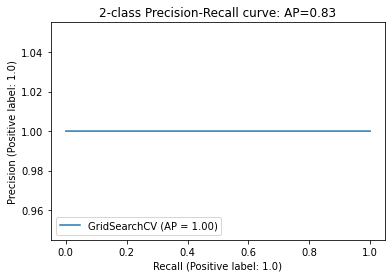

In [126]:
from sklearn.metrics import plot_precision_recall_curve
disp = plot_precision_recall_curve(clf, X_test, y)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(precision))

In [45]:
prediction = clf.predict([[3.54000000e+02, 3.98037461e+04, -4.00564972e-01, 5.96581921e+01,
   7.90960452e-02]])
print(prediction == 0)

[ True]


In [46]:
# saving the model 
import pickle 
pickle_out = open("prot_classifier.pkl", mode = "wb") 
pickle.dump(clf, pickle_out) 
pickle_out.close()